# Dyanmics HW 10: Chaos
### This code is copied from http://www.eg.bucknell.edu/~phys310/jupyter/chaotic_pendulum.html
### The questions are from Andrew MacFadyen and Matthew Gronert

## IMPORTANT: Read all of the instructions and explanations first. These snippets of code are not the homework. You will use them to answer the questions which are located at the bottom of the document. 

### Import the following packages, and execute the code defining the ODE.

In [1]:
import numpy as np
from scipy import integrate

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# Following sets up LateX fonts
#mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#mpl.rc('text', usetex=True)

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

## Some extra mathematical background.

When you numerically solve ODEs it is important to work in dimensionless units. This way you can make objective statements about what a small time step is, or a small change in the driving force etc. It is also important when doing real scientific computing because you have finite accuracy. For example, if you were to do a computation with $\hbar$, it would be very silly to use the SI units as $ \hbar \approx 10^{-34}$ because you will run out of machine percision. 

Of course we will have to pick the right scales to nondimensionalize. The ODE for the driven damped pendulum is: $\dfrac{d^2\phi}{dt^2} +2\beta\dfrac{d\phi}{dt} +\omega_0^2 \sin{\phi}= \gamma \omega_0^2 \cos(\omega_d t)$

We should choose as our natural unit of time $\omega_0^{-1}$ and then let $t\prime = \omega_0 t$. Then the ODE becomes $\dfrac{d^2\phi}{dt\prime^2} +b \dfrac{d\phi}{dt\prime} +\sin{\phi}= \gamma \cos(\omega_ d \prime t\prime)$

Where now $b = 2\beta/\omega_0$, $\omega_d \prime  = \omega_d/ \omega_0$. We will now drop the primes and just know what these dimensionless quantities represent. In these units the period is $2\pi$. Next we make the second order ODE a system of first order ODEs and we have

$\dfrac{d \phi}{dt} = \omega$ and $\dfrac{d\omega}{dt} = -b \omega  - \sin{\phi} + \gamma \cos{\omega_d t}$



In [3]:
# Function returning derivatives of the dependent quantities u[0] 
# and  u[1], or more physically in this case, phi and omega.
def eqs(u,t,b,gam,om_d):
    ph = u[0]
    om = u[1]
    return (om,-np.sin(ph) - b*om + gam*np.cos(om_d*t))

## Use the following three snippets of code to plot $\phi$ and $\omega$ vs. time

In [58]:
ph0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([ph0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
gam = 1.15        # Driving amplitude
om_d = 2./3     # Driving frequency

In [59]:
# NOTE: The time points t selected for the output are not the 
# points used for the numerical evalution.
t = np.linspace(0,50*2.*np.pi,50*201)

ph, om = integrate.odeint(eqs,u0,t,args=(b,gam,om_d)).T

<IPython.core.display.Javascript object>


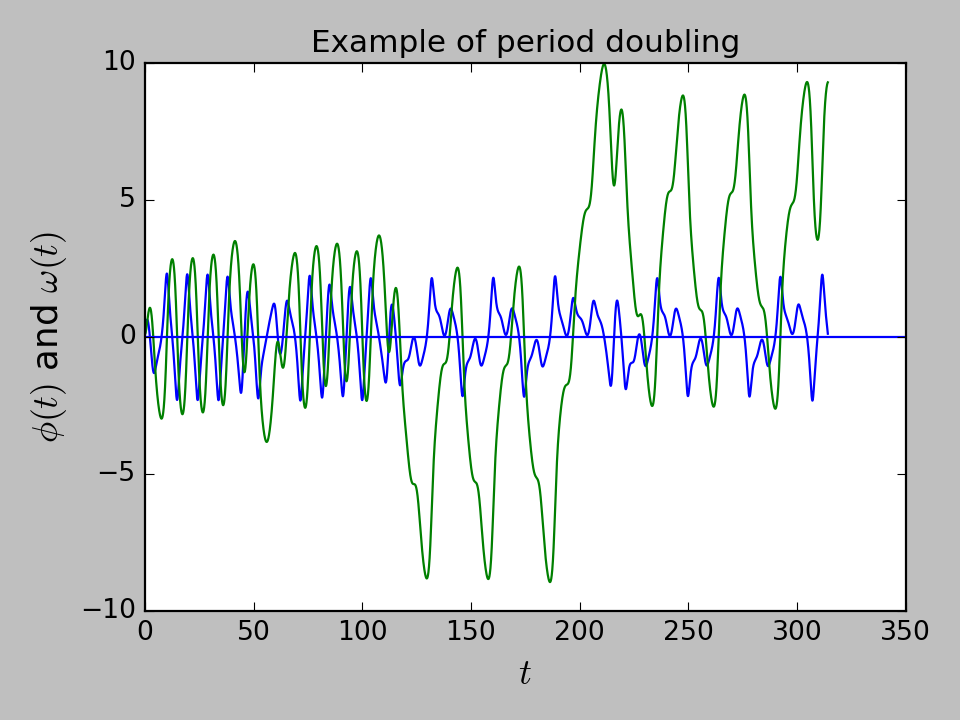

In [60]:
plt.figure(1)
plt.plot(t,om)
plt.plot(t,ph)
plt.axhline(0)
plt.title("Example of period doubling",fontsize=14)
plt.xlabel("$t$")
plt.ylabel("$\\phi(t)$ and $\omega(t)$");

## Given that you've already integrated the ODE like above, use this snippet of code to plot phase space trajectory.

<IPython.core.display.Javascript object>


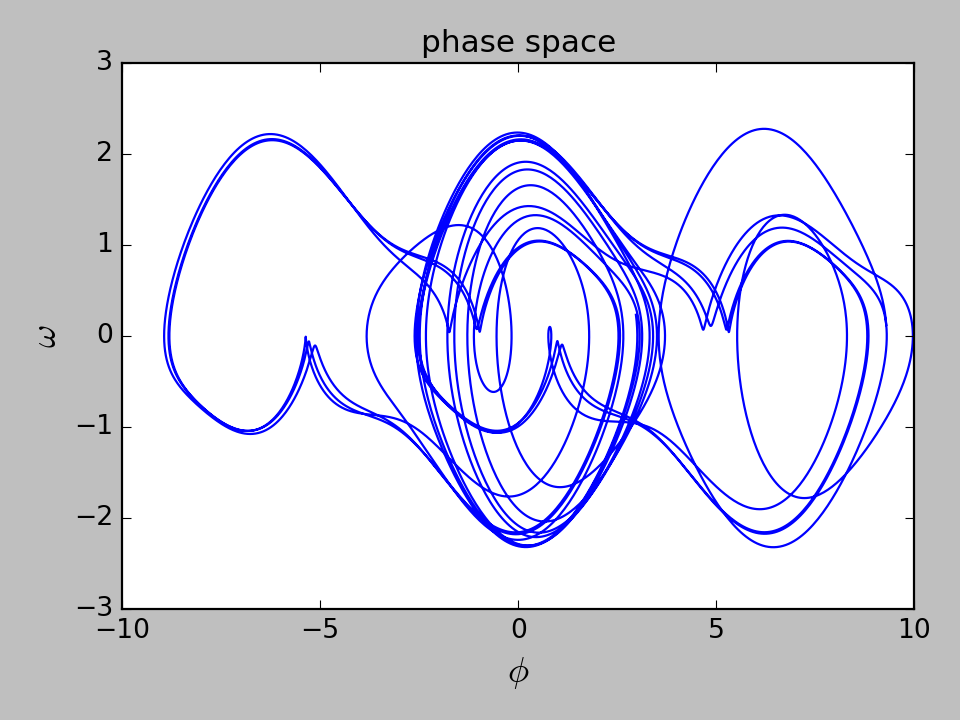

In [61]:
plt.figure(2)
plt.xlabel("$\\phi$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 1000
plt.plot(ph[tplot:],om[tplot:]);

## Use the following snippets of code to plot Poincare Sections. Be sure to set the parameters again in this section.

In [145]:
ph0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([ph0,om0])# Combine initial conditions in array
b = 0.49        # Damping parameter
gam = 1.15        # Driving amplitude
om_d = 2./3     # Driving frequency
t_d = 2*np.pi/om_d

t = np.linspace(0,1000*t_d, 10001)      # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
ph, om = integrate.odeint(eqs,u0,t,args=(b,gam,om_d)).T

<IPython.core.display.Javascript object>


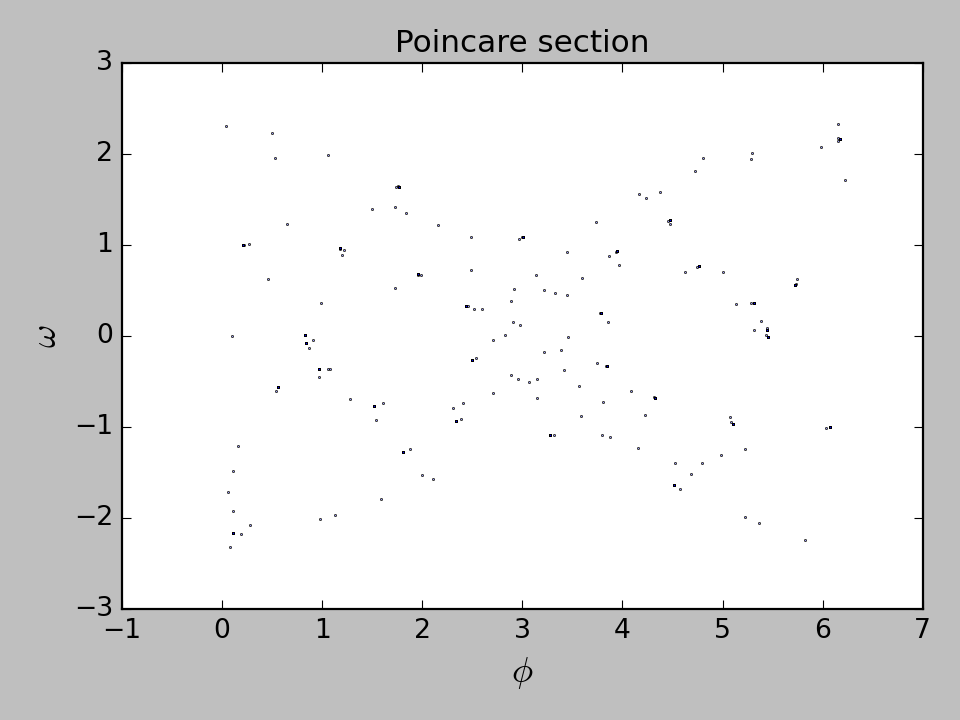

In [146]:
plt.figure(3)
plt.xlabel("$\\phi$")
plt.ylabel("$\omega$")
plt.title("Poincare section",fontsize=14)
plt.scatter(ph%(2*np.pi),om,s=0.1);

# Exercises
## Type up your answers and include the figures you produced for full credit. Consider using Latex!

1. a) Approximate Feigenbaum's Delta by varying $\gamma$. Try to get maybe two or three period doublings. Make small variations like in the second and third decimal place. It will not be a very good estimate. If you get a very good answer, that's how I will know you cheated! b) What is an easier way to tell the perioud doubled: looking at the $\phi$ vs $t$ plot or at the phase space trajectory?

2. When we studied phase space trajcetories in Hamiltonian mechanics we said that trajectories could not intersect themselves. This had to be the case because we wanted for there to be a unique deterministic trajectory. If the trajectory intersected itself that would imply that the state of the system does not determine its evolution and that would really stink for our classical theory. Increase $\gamma$ to 1.15 and plot the phase space trajectory. Notice how criss crossed it is! Experiments match this too. Were we wrong to assert that phase space trajectories must not cross always? Is this system not deterministic? Is something being ignored in the phase space plots?

3. If you increase $\gamma$ in the period doubling route to chaos, the bahavior gets increasingly complicated. What happens if you increase $\gamma$ by a lot to say 4? Does behavior make sense? Explain.

4. Set $\gamma$ to 1.15. Now do two runs of the pendulum: one with the original initial conditions and one wheree you increase $\phi_0$ by 0.01. Plot the two trajectories vs. time. Plot the log of the difference between the two trajectories vs time. Describe this plot. What happens to the log of the difference at very long times? Explain why. 

5. Set $\gamma$ to 1.15. Now plot the Poincare Section. Change the damping $b$ up and down by 0.01 a few times and plot the corresponding Poincare Sections. Qualitatively describe the plots. Do you see a trend? Can you give a physics reason for what you see? 
